# TROPESS Primer Notebook: NetCDF-4 Metadata/Data Read and Plot


## Notebook Author / Affiliation
David F. Moroni (david.f.moroni@jpl.nasa.gov) / Jet Propulsion Laboratory, Californa Institute of Technology

## Date Authored
7 August 2023

## Acknowledgements
The research was carried out at the Jet Propulsion Laboratory, California Institute of Technology, under a contract with the National Aeronautics and Space Administration (80NM0018D0004). Government sponsorship acknowledged.

## Getting Started

In this notebook, we will access a local file of the TROPESS CrIS-JPSS1 L2 Carbon Monoxide for Forward Stream, Summary Product V1 dataset. DOI:<a href="https://doi.org/10.5067/JL1HT3NGEAW3">10.5067/JL1HT3NGEAW3</a>

We will access the data file from local storage, load data variables into memory, and plot the data on a 2-D global map.

### Requirements

#### Python 3

Most of these imports are from the Python standard library. However, you will need to install these packages into your Python 3 environment if you have not already done so:

* netCDF4
* matplotlib
* cartopy
* optparse

In [1]:
import netCDF4
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.axes
import matplotlib.ticker as mticker
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from optparse import OptionParser
from netCDF4 import Dataset

### Read the netCDF file into memory

In [2]:
nc_file = "TROPESS_CrIS-JPSS1_L2_Summary_CO_20230729_MUSES_R1p20_FS_F0p6.nc"
print ( nc_file )

# -----------------------------
# Open netCDF4 file for reading
# -----------------------------
try:
    nc_file = Dataset( nc_file, 'r' )
except IOError:
    print ('not a valid netCDF file')

TROPESS_CrIS-JPSS1_L2_Summary_CO_20230729_MUSES_R1p20_FS_F0p6.nc


### Open with the netCDF file, starting with reading in the Global Attributes.

In [3]:
def readGlobalAttrs( nc_file ):

  attr_list = []
  global_attr = []
  for attr_name in nc_file.ncattrs():
    attr_list.append( attr_name )
    atts = getattr( nc_file, attr_name )
    global_attr.append( atts )
  return attr_list, global_attr 

### Print the netCDF Global Attributes

In [4]:
print ('Global attributes:')
[attr_list, global_attr] = readGlobalAttrs( nc_file )

natts = len(attr_list)
for n in range(0, natts):
     print (attr_list[n]," = ",global_attr[n])

Global attributes:
ShortName  =  TRPSYL2COCRS1FS
LongName  =  TROPESS CrIS-JPSS1 L2 Carbon Monoxide for Forward Stream, Summary Product
title  =  TROPESS CrIS-JPSS1 L2 Carbon Monoxide for Forward Stream, Summary Product
VersionID  =  1
IdentifierProductDOIAuthority  =  https://doi.org/
IdentifierProductDOI  =  10.5067/JL1HT3NGEAW3
Format  =  NetCDF-4
ProductionDateTime  =  2023-08-02T19:13:28Z
RangeBeginningDate  =  2023-07-29
RangeBeginningTime  =  00:00:00.0
RangeEndingDate  =  2023-07-29
RangeEndingTime  =  23:59:59.0
ProcessingLevel  =  2
GranuleID  =  TROPESS_CrIS-JPSS1_L2_Summary_CO_20230729_MUSES_R1p20_FS_F0p6.nc
SouthBoundingCoordinate  =  -67.0
NorthBoundingCoordinate  =  85.0
WestBoundingCoordinate  =  -180.0
EastBoundingCoordinate  =  180.0
source  =  MUSES v1.20
history  =  20230802T191328Z: original file created at TROPESS SIPS
Conventions  =  CF-1.8
MeasuredParameter  =  CO
Platform  =  JPSS-1
Instrument  =  CrIS


### Store Start Date of Data Coverage

In [5]:
startdate = global_attr[8]

### Read the netCDF Variables and Attribute Metadata

In [6]:
var_list = []
var_attr_list = []
var_data_list = []
def readVars ( nc_file ):
      vars =  nc_file.variables.keys()
      for var_name in vars:
          attr = nc_file.variables[var_name]
          vardata = nc_file.variables[var_name][:]
          var_attr_list.append( attr )
          var_data_list.append( vardata)
      return vars, var_attr_list, var_data_list

### Read and Describe the netCDF Un-Grouped Variable Attributes

In [7]:
print ('Un-Grouped netCDF Variables:')
[vars, var_attr_list, var_data_list] = readVars( nc_file )
nvars = len(vars)
print ('Number of Un-Grouped variables = ', nvars)
for i in range(0, nvars):
    vardata = var_data_list[i]
    print ('----------')
    print (var_attr_list[i])
    print (list(vars)[i], '[0:10] =\n', list(vardata)[0:10])

Un-Grouped netCDF Variables:
Number of Un-Grouped variables =  19
----------
<class 'netCDF4._netCDF4.Variable'>
float32 longitude(target)
    _FillValue: -999.0
    long_name: longitude
    standard_name: longitude
    comment: longitude of earth view target center
    units: degrees_east
    valid_range: [-180.  180.]
    missing_value: -999.0
    source: MUSES:Lite:Longitude
unlimited dimensions: 
current shape = (39828,)
filling on
longitude [0:10] =
 [178.75772, 24.451992, 27.574898, 24.32936, 21.118322, 26.71078, 27.53994, 31.590868, 7.6547256, 23.578438]
----------
<class 'netCDF4._netCDF4.Variable'>
float32 latitude(target)
    _FillValue: -999.0
    long_name: latitude
    standard_name: latitude
    comment: latitude of earth view target center
    units: degrees_north
    valid_range: [-90.  90.]
    missing_value: -999.0
    source: MUSES:Lite:Latitude
unlimited dimensions: 
current shape = (39828,)
filling on
latitude [0:10] =
 [45.401276, -66.64313, -65.79367, -65.793945,

pressure [0:10] =
 [masked_array(data=[1022.4970092773438, 908.5139770507812, 681.291015625,
                   510.89801025390625, 383.11700439453125,
                   287.2980041503906, 215.44400024414062,
                   161.56100463867188, 121.1520004272461,
                   90.85179901123047, 51.089599609375, 28.729900360107422,
                   4.641600131988525, 0.10000000149011612],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False],
       fill_value=-999.0,
            dtype=float32), masked_array(data=[1000.0, 908.5139770507812, 681.291015625,
                   510.89801025390625, 383.11700439453125,
                   287.2980041503906, 215.44400024414062,
                   161.56100463867188, 121.1520004272461,
                   90.85179901123047, 51.089599609375, 28.729900360107422,
                   4.641600131988525, 0.10000000149011612],
             mask=[False, False, Fa

xa [0:10] =
 [masked_array(data=[1.3666243603438488e-07, 1.2462523102385603e-07,
                   9.956215052397965e-08, 1.0751584511581314e-07,
                   1.060340153458128e-07, 9.722890581542742e-08,
                   7.698305637404701e-08, 5.643188671911048e-08,
                   4.3749491140943064e-08, 3.522919556075976e-08,
                   2.257625730806012e-08, 1.828125029135208e-08,
                   2.3891891132166165e-08, 2.6293230703799964e-08],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False],
       fill_value=-999.0,
            dtype=float32), masked_array(data=[6.25134006781991e-08, 6.274299124697791e-08,
                   6.343682912302029e-08, 6.423239540254144e-08,
                   6.392854601244835e-08, 6.120508544427139e-08,
                   5.411872194827083e-08, 4.2660872168198694e-08,
                   3.200635134703589e-08, 2.0696788283203205e-08,
       

col_dry_air [0:10] =
 [361653.1, 352158.9, 352170.2, 352171.03, 352167.0, 352219.22, 352237.28, 352285.62, 352219.94, 352248.72]
----------
<class 'netCDF4._netCDF4.Variable'>
float32 ak_col(target, level)
    _FillValue: -999.0
    long_name: column_averaging_kernel
    comment: Linearized column averaging kernel for the column; from the surface to Top of Atmosphere (TOA); Applies to `col`
    units: mol m-2
    missing_value: -999.0
    source: Derived
    for_molecules_per_cm2_multiply_by: 6.022141e+19
unlimited dimensions: 
current shape = (39828, 14)
filling on
ak_col [0:10] =
 [masked_array(data=[-1319.7521 ,  -163.11581, 17684.775  , 36208.883  ,
                   41780.777  , 37304.54   , 29129.781  , 18989.91   ,
                   10966.3955 ,  7431.4595 ,  4080.5344 ,   716.4382 ,
                   -2017.9512 ,  -409.53665],
             mask=False,
       fill_value=1e+20,
            dtype=float32), masked_array(data=[   47.1065,   693.1879,  5562.982 , 19171.076 ,
     

ak_x_col [0:10] =
 [masked_array(data=[-0.00364922, -0.00045103,  0.04889983,  0.10012048,
                    0.11552722,  0.10315006,  0.0805462 ,  0.05250863,
                    0.03032297,  0.02054858,  0.01128301,  0.00198101,
                   -0.0055798 , -0.0011324 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32), masked_array(data=[ 0.00013376,  0.0019684 ,  0.01579679,  0.05443871,
                    0.06826098,  0.05751386,  0.04129045,  0.02769023,
                    0.01777057,  0.01554823,  0.00977783, -0.01242718,
                   -0.01530253, -0.00113829],
             mask=False,
       fill_value=1e+20,
            dtype=float32), masked_array(data=[ 8.3412095e-05,  7.0827518e-04,  3.8688625e-03,
                    2.9610211e-02,  4.5377105e-02,  3.8500652e-02,
                    2.7097274e-02,  1.8060502e-02,  1.1608001e-02,
                    1.0255573e-02,  6.3809287e-03, -9.4452677e-03,
                   -9.3128262e-03, -6.

### List the Un-grouped Variables

In [8]:
list(vars)

['longitude',
 'latitude',
 'time',
 'datetime_utc',
 'year_fraction',
 'altitude',
 'pressure',
 'target_id',
 'x',
 'xa',
 'col',
 'col_error',
 'col_dry_air',
 'ak_col',
 'pwf_col',
 'x_col',
 'x_col_error',
 'ak_x_col',
 'h2o_col']

### Read the Un-grouped Variables

In [9]:
lon = nc_file.variables['longitude'][:]
lat = nc_file.variables['latitude'][:]
time = nc_file.variables['time'][:]
datetime_utc = nc_file.variables['datetime_utc'][:]
year_frac = nc_file.variables['year_fraction'][:]
alt = nc_file.variables['altitude'][:]
press = nc_file.variables['pressure'][:]
target = nc_file.variables['target_id'][:]
x = nc_file.variables['x'][:]
xa = nc_file.variables['xa'][:]
col = nc_file.variables['col'][:]
col_err = nc_file.variables['col_error'][:]
col_dry_air = nc_file.variables['col_dry_air'][:]
ak_col = nc_file.variables['ak_col'][:]
pwf_col = nc_file.variables['pwf_col'][:]
x_col = nc_file.variables['x_col'][:]
x_col_err = nc_file.variables['x_col_error'][:]
ak_x_col = nc_file.variables['ak_x_col'][:]
h20_col = nc_file.variables['h2o_col'][:]

### Read the netCDF Group Variables

In [10]:
nc_file.groups

{'geolocation': <class 'netCDF4._netCDF4.Group'>
 group /geolocation:
     comment: CrIS geolocation information
     dimensions(sizes): 
     variables(dimensions): int16 cris_granule(target), int16 cris_atrack(target), int16 cris_xtrack(target), int16 cris_fov(target), float32 cris_view_ang(target)
     groups: ,
 'geophysical': <class 'netCDF4._netCDF4.Group'>
 group /geophysical:
     comment: geophysical attributes
     dimensions(sizes): 
     variables(dimensions): int32 land_flag(target), int16 day_night_flag(target)
     groups: }

### Read the Geolocation Group Variables

In [11]:
grp_geo = nc_file.groups['geolocation']

### Describe the Geolocation Group Variables

In [12]:
grp_geo

<class 'netCDF4._netCDF4.Group'>
group /geolocation:
    comment: CrIS geolocation information
    dimensions(sizes): 
    variables(dimensions): int16 cris_granule(target), int16 cris_atrack(target), int16 cris_xtrack(target), int16 cris_fov(target), float32 cris_view_ang(target)
    groups: 

### List the Geolocation Group Variables

In [13]:
list(grp_geo.variables)

['cris_granule', 'cris_atrack', 'cris_xtrack', 'cris_fov', 'cris_view_ang']

### Read the Geophysical Flags Group Variables

In [14]:
grp_flags = nc_file.groups['geophysical']

### Describe the Geophysical Flags Group Variables

In [15]:
grp_flags

<class 'netCDF4._netCDF4.Group'>
group /geophysical:
    comment: geophysical attributes
    dimensions(sizes): 
    variables(dimensions): int32 land_flag(target), int16 day_night_flag(target)
    groups: 

### List the Geophysical Flags Group Variables

In [16]:
list(grp_flags.variables)

['land_flag', 'day_night_flag']

### Read the Discrete Variables within the Variable Groups

In [17]:
cris_granule = grp_geo.variables['cris_granule'][:]
cris_atrack = grp_geo.variables['cris_atrack'][:]
cris_xtrack = grp_geo.variables['cris_xtrack'][:]
cris_fov = grp_geo.variables['cris_fov'][:]
cris_view_ang = grp_geo.variables['cris_view_ang'][:]
land_flag = grp_flags.variables['land_flag'][:]
day_night_flag = grp_flags.variables['day_night_flag'][:]

### Generate a 2-D Lat/Lon Map of Total Column Carbon Monoxide (CO)

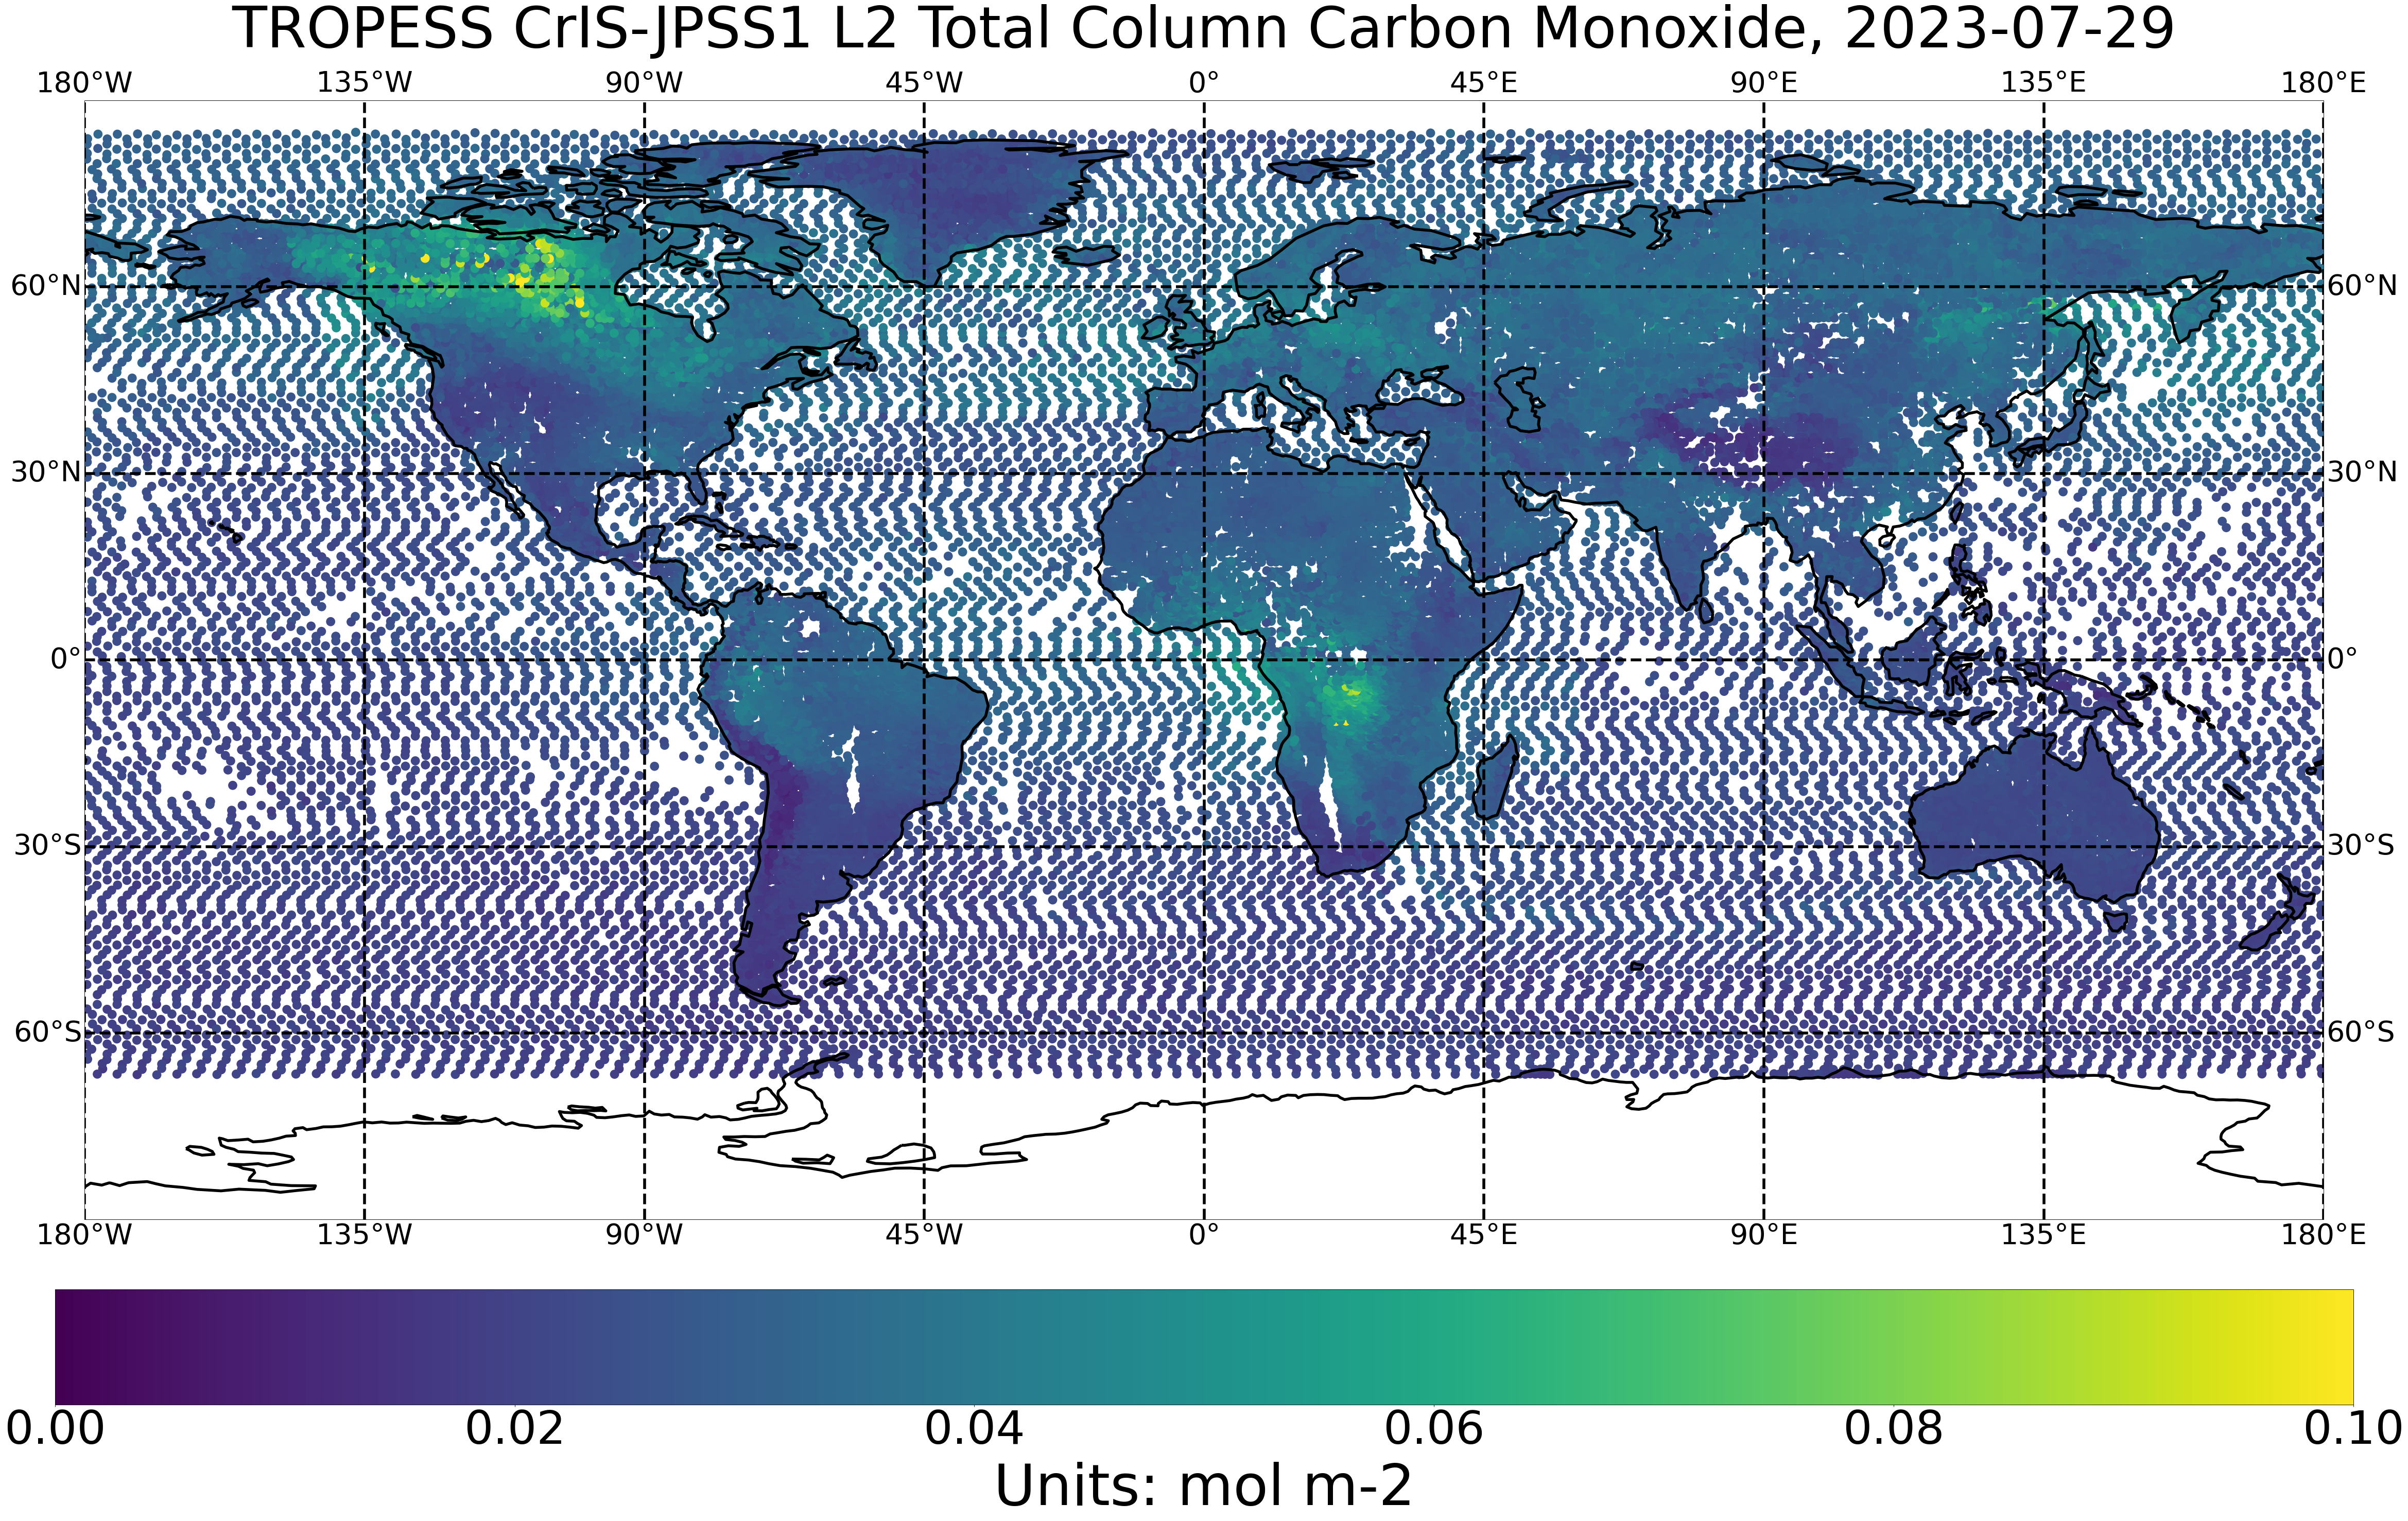

In [18]:
# Set the figure size, projection, and extent
plt.figure(figsize=(90, 45), dpi=80)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=5,zorder=5)
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linestyle='--',linewidth=5,color='black')
gl.xlocator = mticker.FixedLocator([-180, -135, -90, -45, 0, 45, 90, 135, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 50, 'color': 'black'}
gl.ylabel_style = {'size': 50, 'color': 'black'}

# Set colorbar levels, then draw the plot and a colorbar
x = ax.scatter(lon[:], lat[:], c=col[:], lw=10, vmin=0., vmax=0.1)
plt.title('TROPESS CrIS-JPSS1 L2 Total Column Carbon Monoxide, '+(startdate), pad=40, size=100)
cb = plt.colorbar(x, orientation="horizontal", pad=0.05, shrink=0.8)
cb.set_label('Units: mol m-2',size=100,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=80)